In [1]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from tensorflow.keras.layers import Dense, BatchNormalization,Dropout
from tensorflow.keras.models import Sequential 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set_theme(style='darkgrid')

In [2]:
epochs = 200
batch_size=40

In [3]:
iris = load_iris()

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
iris['filename']

'/opt/conda/lib/python3.7/site-packages/sklearn/datasets/data/iris.csv'

In [6]:
iris['data'].shape

(150, 4)

In [7]:
type(iris['data'])

numpy.ndarray

In [8]:
x_train, x_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size=0.2, random_state=32)

In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [10]:
x_train = scale(x_train)
x_test = scale(x_test)

In [11]:
num_classes = np.unique(y_train).shape[0]

In [12]:
y_train = to_categorical(y_train, num_classes = num_classes)
#y_test = to_categorical(y_test, num_classes = num_classes)

In [13]:
x_train.shape

(120, 4)

In [14]:
# pred = model.predict(x_test)
# pred.argmax(axis=1)

In [15]:
ep = list(range(epochs))

## With bathNormalization

[[12  0  0]
 [ 0  6  0]
 [ 0  3  9]]
1/1 [==============================] - 0s 13ms/step - loss: 0.2203 - accuracy: 0.9000


[0.22034001350402832, 0.8999999761581421]

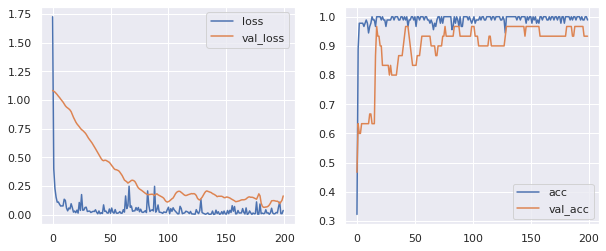

In [16]:
def build_moel():
    model = Sequential()
    model.add(Dense(64, input_shape=(4,), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(3, activation='softmax'))
    return model
model = build_moel()
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
#hist = model.fit(x_train, y_train, epochs=epochs, batch_size=16, validation_data=(x_test, y_test))
hist = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.25,verbose=0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
sns.lineplot(ep, hist.history['loss'], label='loss', ax=ax1)
sns.lineplot(ep, hist.history['val_loss'], label='val_loss', ax=ax1)

sns.lineplot(ep, hist.history['accuracy'], label='acc', ax=ax2)
sns.lineplot(ep, hist.history['val_accuracy'], label='val_acc', ax=ax2)

cf = confusion_matrix(model.predict(x_test).argmax(axis=1), y_test)
print(cf)
model.evaluate(x_test, to_categorical(y_test, num_classes=3))

## Better BN

[[12  0  0]
 [ 0  8  0]
 [ 0  1  9]]
1/1 [==============================] - 0s 13ms/step - loss: 0.1641 - accuracy: 0.9667


[0.16406495869159698, 0.9666666388511658]

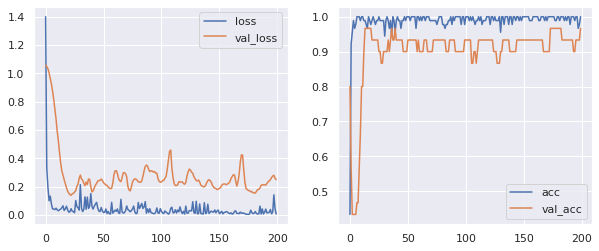

In [18]:
def build_moel1():
    model = Sequential()
    model.add(Dense(64, input_shape=(4,), activation='relu'))
    model.add(BatchNormalization(
        momentum=0.95, 
        epsilon=0.005
    ))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization(
        momentum=0.95, 
        epsilon=0.005
    ))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization(
        momentum=0.95, 
        epsilon=0.005
    ))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization(
        momentum=0.95, 
        epsilon=0.005
    ))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization(
        momentum=0.95, 
        epsilon=0.005
    ))
    model.add(Dense(3, activation='softmax'))
    return model
model1 = build_moel1()
model1.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
#hist = model.fit(x_train, y_train, epochs=epochs, batch_size=16, validation_data=(x_test, y_test))
hist1 = model1.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.25,verbose=0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
sns.lineplot(ep, hist1.history['loss'], label='loss', ax=ax1)
sns.lineplot(ep, hist1.history['val_loss'], label='val_loss', ax=ax1)

sns.lineplot(ep, hist1.history['accuracy'], label='acc', ax=ax2)
sns.lineplot(ep, hist1.history['val_accuracy'], label='val_acc', ax=ax2)
cf = confusion_matrix(model1.predict(x_test).argmax(axis=1), y_test)
print(cf)
model1.evaluate(x_test, to_categorical(y_test, num_classes=3))

## No batchNormalization

[[12  0  0]
 [ 0  8  1]
 [ 0  1  8]]
1/1 [==============================] - 0s 16ms/step - loss: 0.2145 - accuracy: 0.9333


[0.21448013186454773, 0.9333333373069763]

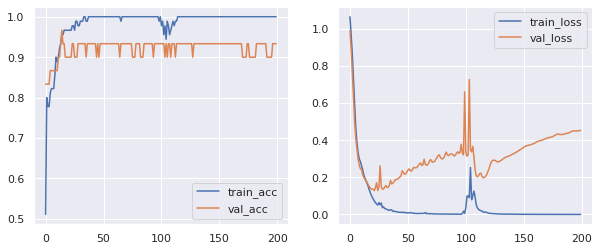

In [19]:
def build_model2():
    model = Sequential()
    model.add(Dense(64, input_shape=(4,), activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    return model
model2 = build_model2()
model2.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
hist2=model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.25,verbose=0)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

sns.lineplot(ep, hist2.history['accuracy'], label='train_acc', ax=ax1)
sns.lineplot(ep, hist2.history['val_accuracy'], label='val_acc', ax=ax1)

sns.lineplot(ep, hist2.history['loss'], label='train_loss', ax=ax2)
sns.lineplot(ep, hist2.history['val_loss'], label='val_loss', ax=ax2)

cf = confusion_matrix(model2.predict(x_test).argmax(axis=1), y_test)
print(cf)
model2.evaluate(x_test, to_categorical(y_test, num_classes=3))

## With dropouts

[[12  0  0]
 [ 0  8  0]
 [ 0  1  9]]
1/1 [==============================] - 0s 14ms/step - loss: 0.3098 - accuracy: 0.9667


[0.3097728192806244, 0.9666666388511658]

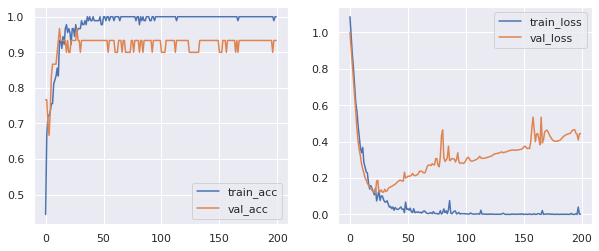

In [20]:
def build_model3():
    model = Sequential()
    model.add(Dense(64, input_shape=(4,), activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))
    return model

model3 = build_model3()
model3.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
hist3=model3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.25,verbose=0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

sns.lineplot(ep, hist3.history['accuracy'], label='train_acc', ax=ax1)
sns.lineplot(ep, hist3.history['val_accuracy'], label='val_acc', ax=ax1)

sns.lineplot(ep, hist3.history['loss'], label='train_loss', ax=ax2)
sns.lineplot(ep, hist3.history['val_loss'], label='val_loss', ax=ax2)

cf = confusion_matrix(model3.predict(x_test).argmax(axis=1), y_test)
print(cf)
model3.evaluate(x_test, to_categorical(y_test, num_classes=3))